# 3. Introduction to Keras and TensorFlow

---
## 3.6 (3.1) Anatomy of a neural network: Understanding core Keras APIs

- Layers;

- Networks;

- Loss and optimisers;

- Data: movie reviews, news reports and urban data.

The three representative problems that we will be solving are: predicting if movie reviews are good or bad; classification of news reports into different classes and the prediction of house prices from neighbourhood data. But just before we start, let's review what we have learned so far. What layers are and what they do, how layers form networks and loss and optimisation.  

Neural network training requires:

- a layered network;

- input data and **targets** (desired mappings);

- a loss function that quantifies performance;

- an optimiser to adjust layer parameters;

Neural network training requires: a layered network, input data and 'targets' (desired mappings), a loss function that quantifies performance and an optimiser to adjust layer parameters.

![understanding-2.png](images/understanding-2.png)

A two layer network. A sample - or, properly,  mini-batch of samples - is fed into the network and the output, or prediction, is compared to the desired target. The loss quantifies any discrepancy and the optimiser tweaks layer parameters in a backwards pass. The optimiser implements the stochastic gradient descent algorithm. SGD moves points in parameter space in the direction of the negative gradient and momentum helps the negotiation of barriers between minima.  

---
## 3.6.1 (3.1.1) Layers: The building blocks of deep learning

The **layer** is the fundamental neural network building block:

- layers map tensors to tensors;

- parameterised by weights and biases;

- weights and biases update in the SGD feedback loop.

The layer is the fundamental neural network building block. Layers map tensors to tensors and are parameterised by weights and biases. Layer parameters update in the SGD feedback loop. 

**Feedforward** networks:

- the sample is fed into the network;

- data is transformed by successive layers;

- an output emerges.

A sample, in a 'feedforward' network, is fed into the network; data is transformed by successive layers and an output emerges.

**Dense/fully connected** layer:

- the layer weight matrix has size $n \times m$;

- the incoming vector has length $m$;

- the output vector has length $n$.

A dense or fully connected layer has an n x m weight matrix; the incoming vector has length m and the outgoing tramsformed vector has length n. The bias tensor is an n component vector.

<img src="images/layers/tikz12.png" style="width: auto;">

**Recurrent** layer:

- a recurrent neural network contains internal loops;

- data is processed by iterating through the sequence of elements.

A 'recurrent' neural network contains internal loops: ordered data is processed by iterating through the sequence of constituent elements. We will cover them in week 7. Recurrent layers are particularly useful when the samples have a time ordering, for example weather measurements. 

<img src="images/layers/RNN-unrolled.png" style="width: auto;">

Source: [Chris Olah, Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

**Convolutional** layer:

- a small window ("kernel" or "filter": a matrix) moves across a 2D image;

- applies a matrix mutliplication at each step;

- the response is mapped to layer weights;

- this is called convolution.

Convolutional layers are the first choice for computer vision applications of deep learning. Convnets move a small window across a 2D image and the response, or convolution, is mapped to layer weights. We will cover ConvNets in week 6.

<img src="images/layers/conv-1.gif" style="width: auto;">

Source: [Irhum Shafkat, Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

**Attention** layer:

- performs a look-up in the data for relevant information, as if it was a hash table (finding relevant values using keys);

- the attention mechanism determins *where* to look and *what* to select;

- given where you are in the data (query), you compare that with entries (keys), and for compatible keys, you retrieve the relevant information (value);

- ultimately, this look-up mechanism is again... a matrix multiplication!

- several look-ups can happen in parallel (several "heads") to retrieve different things.

Attention layers quickly became the first choice for text and sequence applications of deep learning, then moved on to take over the world! They are now winning the SOTA pretty much everywhere, including in vision, possibly displacing the Convents entirely. We cover them in week 7.

<img src="images/layers/attention.png" style="width: auto;">

Source: [Google AI Blog, "Transformer: A Novel Neural Network Architecture for Language Understanding ](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)

|Network|Data|Note|
|:---|:---|:---|
|Dense|Vector|Rarely the only type in a net, used as a final layer|
|Recurrent|Sequence|Now displaced by attention, still in use in RL|
|Convolutional|Image|Being displaced by attention|
|Attention|Vector, Sequence, Image|**Everything!**, basically ruling the field now|

A layer performs a tensor operation on the input $x$ – an affine transformation followed by element-wise function application

We return to dense layers and feedforward networks. The dense layer performs a tensor operation on an input $x$. Namely, an affine transformation followed by element-wise function application.

Affine transformation:

\begin{align*}
z = \begin{pmatrix}w_{11} & w_{12} \\ w_{21} & w_{22} \end{pmatrix} \cdot \begin{pmatrix}x_1 \\ x_2 \end{pmatrix} + \begin{pmatrix}b_1 \\ b_2 \end{pmatrix}
\end{align*}

- rotations, reflections, shears, dilations;

- affine transformation preserve straight lines and parallel lines remain parallel;

- distances and angles may change.

An affine transformation is a 2D matrix transformation such as a rotation, a reflection or a shear, followed by a translation. w dot x plus b. Straight lines remain straight and parallel lines remain parallel – although distances and angles may change.

Affine transformations alone are insufficient for data uncrumpling: compositions of linear transformations remain linear!

We require a **non-linear** part – the activation.

$f(z) = f\begin{pmatrix} z_1 \\ z_2 \end{pmatrix}\ =\begin{pmatrix} f(z_1) \\ f(z_2) \end{pmatrix}$

The **sigmoid**, **rectified linear unit (ReLU)** and **tanh** are common activation functions.

Affine transformations alone are insufficient for data uncrumpling. We require a non-linear part –  the element-wise activation. 'Sigmoid', 'rectified linear' and 'tanh' are common activation functions.

\begin{align*}
\text{relu}(x) &= \max(0, x) \\
\\
\tanh(x)&= \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} +1} \\
\\
\text{sigmoid}(x) &= \frac{1}{1 + e^{-x}}
\end{align*}

The definitions of relu (recified linear), tanh and sigmoid.

In [56]:
import numpy as np
def relu(z):
    return np.maximum(z, 0)

def plot_relu():
    import matplotlib.pyplot as plt
    x = np.arange(-2, 2, 0.1)
    plt.plot(x, relu(x), 'b', label='relu')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')
    plt.legend()
    plt.grid()
    plt.show()

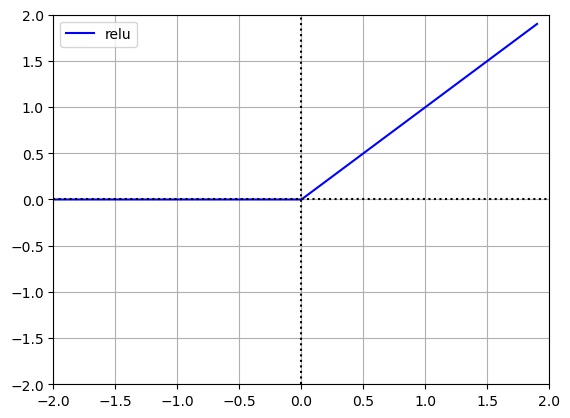

In [57]:
plot_relu()

Here is the shape of the ReLu activation function, that is called positive part in mathemathics, and you can see why: if the input is negative, return zero, otherwise just act linearly. It is very efficient from a computational point of view! There are many variants of this function, like Elu or Gelu, the purpose of which is to stop having just zero in the negative domain, which kills off all signal.

In [2]:
import numpy as np
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def plot_sigmoid():
    import matplotlib.pyplot as plt
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, sigmoid(x), 'b', label='sigmoid')
    plt.xlim([-5,5])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')    
    plt.legend()
    plt.grid()
    plt.show()

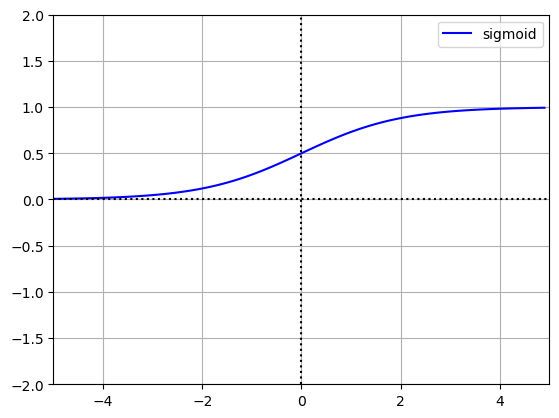

In [55]:
plot_sigmoid()

Here is the shape of the sigmoid function... It is like a a smoothed out (and therefore differentiable) step function. Large positive inputs are mapped to 1, large negative inputs are mapped to zero and there is smooth transition around 0.

In [52]:
import numpy as np
def tanh(z):
    e = np.exp(2*z)
    return (e - 1)/(e + 1)

def plot_tanh():
    import matplotlib.pyplot as plt
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, tanh(x), 'b', label='tanh')
    plt.xlim([-5,5])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')      
    plt.legend()
    plt.grid()
    plt.show()

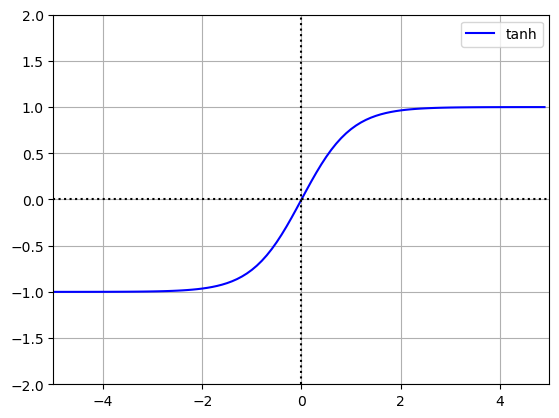

In [53]:
plot_tanh()

Here is the shape of the tanh function... It is also a smoothed out (and therefore differentiable) step function, but this time large positive inputs are mapped to 1,  and large negative inputs are mapped to -1, with the same smooth transition around 0.

<img src="images/activation-functions-stanford-cs231n.png" style="width: auto; height: 700px;">

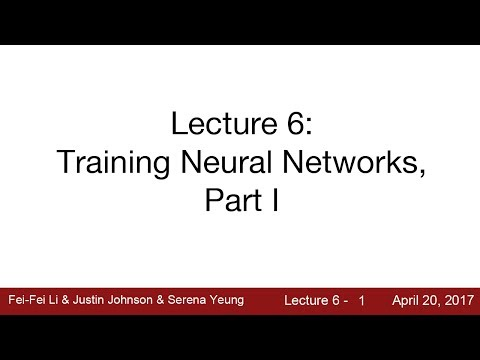

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('wEoyxE0GP2M', width=853, height=480, start=289) # Stanford cs231n Activation Functions

Suppose a layer performs a rotation, $R(x)$, with no translation ($b = 0$), and then sigmoids each element of the rotated vector

- a rotation 

\begin{align*}
z =  \begin{pmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta 
\end{pmatrix} \cdot\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
\end{align*}

- element wise sigmoid application 

\begin{align*}
\begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix}\sigma(z_1) \\ \sigma(z_2)\end{pmatrix}
\end{align*}

Suppose a layer performs a rotation, $R(x)$, with no translation ($b = 0$), and then sigmoids each element of the rotated vector.

In [17]:
import numpy as np

# our rotation
theta = 3 * np.pi / 4
w = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# original square
o = np.array([0, 0])
a = np.array([1, 0])
b = np.array([1, 1])
c = np.array([0, 1])

points = np.array([o, a, b, c, o])
x, y = points.T

# rotated square
points_p = points @ w.T
x_p, y_p = points_p.T

# sigmoid square
points_pp = sigmoid(points_p)
x_pp, y_pp = points_pp.T

def transform_square():
    import matplotlib.pyplot as plt
    plt.plot(x, y, 'b-', label="1. original")
    plt.plot(x_p, y_p, 'r-', label="2. rotated")
    plt.plot(x_pp, y_pp, 'g-', label="3. sigmoid")
    plt.text(-0.01, -.11, "↑ Sigmoid will squeeze inputs")
    plt.text(0, -.22, "inside our blue unit square")
    plt.axis('equal')
    plt.legend()
    plt.grid()
    plt.show()

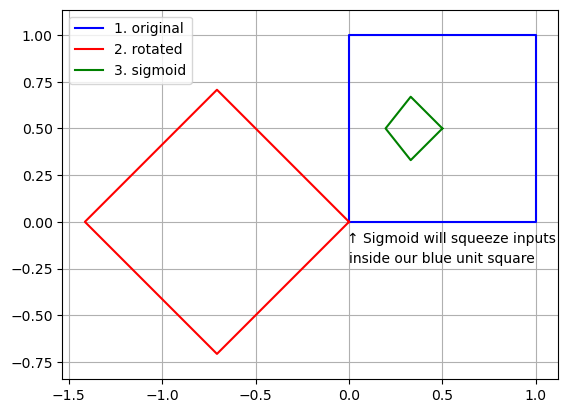

In [18]:
transform_square()

...the blue unit square has been rotated by $\frac{3\pi}{4}$. The vertices of the red square are then sigmoided - the green quadrilateral.

The input and output tensor shapes of a TensorFlow Keras layer are fixed when the layer is created.

In [5]:
from tensorflow.keras import layers

layer = layers.Dense(32, input_shape = (784, ))

The input and output tensor shapes of a TensorFlow Keras layer are fixed when the layer is created. Axis 1 of the input shape has dimension 784. The zero axis - the batch dimension - is unspecified and arbitrary. This layer outputs a vector of length 32.

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape = (784, )))
model.add(layers.Dense(16))

...the connecting downstream layer must expect a compatible input vector – 32 elements along the first axis. In fact Tensorflow is clever enough to know this. If you wish the second layer to output a tensor with 16 elements along the first axis you need only write `layers.Dense(16)`.

In [7]:
# Axis zero has size 'None' - any value is accepted 

print(model.layers[0].input_shape, model.layers[0].output_shape)

(None, 784) (None, 32)


The shapes of the input and output tensors of the first (index 0) layer... Axis  zero has size None, meaning that any value is accepted. 

In [8]:
# The weight and bias tensors
def print_layer_tensor_shape(n):
    weight_params = model.layers[n].get_weights()[0]
    bias_params = model.layers[n].get_weights()[1]
    print('layer: ', n, '\tweight shape: ', weight_params.shape, '\tbias shape', bias_params.shape)

print_layer_tensor_shape(0)
print_layer_tensor_shape(1)

layer:  0 	weight shape:  (784, 32) 	bias shape (32,)
layer:  1 	weight shape:  (32, 16) 	bias shape (16,)


Code to print the shape of layer tensors... The weight shape is the reverse of the matrix size. I said earlier that the layer zero weight matrix has size $n \times m$ where $m$ is the length of the input vector and $n$ is the length of the outgoing vector. The layer weight tensors have shape `(m, n)` - they are matrix transposes.  

\begin{align*}
(w\cdot x
)_i &= \sum_j w_{ij}x_j \\
    &= \sum_j x_j w_{ij} \\
    &= \sum_j x_j w_{ji}^T \\
    &= (x^T \cdot w^T)_i
\end{align*}

It turns out - and it doesn't matter at all - that TensorFlow organises its tensor operations using the transposes of the conventional matrix and vector representations. This slide shows the relationship between the two ways of performing matrix-vector multiplication. It doesn't matter at all because all computational quantities are arrays (not tensors or matrices) and operations are loops with appropriate counters and end conditions. And it certainly doesn't matter to us because TensorFlow ensures that everything matches. 

---
## 3.6.2 From layers to models

## (3.1.2 Models: networks of layers)

A feed forward network is a directed acyclic graph of layers

A linear stack of layers is common but there are also two-branch layers, multihead layers, 'Inception' layers...

A feed forward network is a directed acyclic graph of layers. A linear stack of layers is common but there are also two-branch layers, multihead layers, 'Inception' layers... again, these more advanced networks are covered in Part 2 of Deep Learning With Python.

The topology of a network and the layer functions define a space of possible data transformations

The layer transformation 
\begin{align*}
y_l = f_l(w_l \cdot x_l + b_l) := L_l(x_l)
\end{align*}

depends on the choice of activation, $f_l$, and the parameter values $(w_l, b_l)$

The topology of a network and the layer functions define a space of possible data transformations. The layer transformation, written here as L sub l, depends on the choice of activation and the parameters w and b.

For example a three layer network transforms $x$ to $y$:

\begin{align*}
y = L_3(L_2((L_1(x))))
\end{align*}

Think of *one choice of* parameters $(w_1, b_1, w_2, b_2, w_3, b_3)$ as a *point* in a large multi-dimensional space – the **hypothesis space**.

Each different setting of the parameters yields a different model → a different **hypothesis** (of how the data behaves).

A three layer network chains $L_1$, $L_2$, and $L_3$. The layer parameters can be thought of as a point in a multi-dimensional 'hypothesis space'. Each point in the hypothesis space corresponds to a particular uncrumpling of the data.  


The hypothesis space is arbitrary.

For almost every aspect of the discipline, one must rely on best practices.

DL is *engineering* (although researchers are racing to make it a science!).

[![xkcd data](images/xkcd-data.png)](https://twitter.com/MIT_CSAIL/status/1571529480081850369?t=_YJZE31qe4MT0pTvWfQnig&s=03)

The hypothesis space - defined by the depth of the network and the size and activation of each layer - is arbitrary. There is no formula. We have to rely on rules of thumb, best practices - deep learning is closer to engineering than it is to mathematics. 

---
## 3.6.3 The "compile" step: Configuring the learning process

## (3.1.3 Loss functions and optimizers: keys to configuring the learning process)

Neural networks have arbitrary model architecture (number of layers, size of each layer) and layer activation.

The loss function and optimiser, specified at compilation is also arbitrary.

Hyperparmeters, such as the SGD learning rate, are not trained: they are tuned.

Neural networks have arbitrary model architecture (depth, size of each layer) and layer activation, but the training scheme is also arbitrary. The loss function and optimiser are chosen rather than determined. The parameters that govern training such as the SGD learning rate and depth of the network are not trained: they are 'tuned' - by humans, although automatic tuning is a possibility. These arbitrary parameters - the ones that *we* choose - are called 'hyperparameters'.

The choice of loss (objective/cost) function is very important!

Luckily there are several standard loss functions for common problems:

- for a binary choice: binary cross-entropy;

- many-class classification: categorical cross-entropy;

- regression: mean squared error.

Categorical cross-entropy is simply the generalisation of the binary version to multiple classes (or vice-versa: binary cross-entropy is just the specific case when there is just one class – and its negation...).

The choice of loss function is very important. Luckily there are some standard loss functions for common problems. 
Categorical cross-entropy is used for many-class classification and mean squared error is a common regression loss, We will explain the meaning of these terms later.

The optimiser is always a variety of stochastic gradient descent (SGD).

`tensorflow.keras` offers several SGD variants.

Bespoke gradient free methods are also possible.

Finally, although TensorFlow Keras provides a choice of optimiser, they are all SGD variants. The framework is versatile enough for non-gradient optimisation techniques such as genetic algorithms and swarm optimisation - as long as you are willing to write the code.   